## 1. Import all the nessessary imports

In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers

# import necessary modules from keras
from keras.layers import Dense, Dropout
from keras.models import Sequential

## 2. Import the IMBD dataset, which is built into keras

In [11]:
from keras.datasets import imdb

(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)

## 3. Set up data and targets

In [12]:
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

## 4. Vectorize the results to suit the NN

In [13]:
# Vectorize reviews with fewer than 10,000 words and pad the excess with zeros
# Every input to the NN needs to be the same size
def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

data = vectorize(data)
targets = np.array(targets).astype("float32")

## 5. Assign the testing and training sets

In [14]:
test_x = data[:10000]
test_y = targets[:10000]
train_x = data[10000:]
train_y = targets[10000:]

## 6. Set up the layers and model

In [15]:
# Set the Model to Sequential
model = models.Sequential()

# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))

# Prints a summary of how the model currently looks
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                500050    
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 505,201
Trainable params: 505,201
Non-trainable params: 0
_________________________________________________________________


## 7. Configure and Train the model

In [16]:
# Configure the model for training
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

# Train the model with the training set against the validated test set
# Epoch of size 15 and a batch size of 1000 - model overfits if and larger
results = model.fit(
 train_x, train_y,
 epochs= 15,
 batch_size = 1000,
 validation_data = (test_x, test_y)
)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 18s 443us/step - loss: 0.4700 - acc: 0.7894 - val_loss: 0.2803 - val_acc: 0.8912
Epoch 2/15
40000/40000 [==============================] - 9s 234us/step - loss: 0.2393 - acc: 0.9090 - val_loss: 0.2598 - val_acc: 0.8966
Epoch 3/15
40000/40000 [==============================] - 9s 235us/step - loss: 0.1763 - acc: 0.9359 - val_loss: 0.2763 - val_acc: 0.8931
Epoch 4/15
40000/40000 [==============================] - 9s 236us/step - loss: 0.1275 - acc: 0.9558 - val_loss: 0.3112 - val_acc: 0.8909
Epoch 5/15
40000/40000 [==============================] - 9s 235us/step - loss: 0.0888 - acc: 0.9705 - val_loss: 0.3650 - val_acc: 0.8876
Epoch 6/15
40000/40000 [==============================] - 10s 240us/step - loss: 0.0610 - acc: 0.9808 - val_loss: 0.4143 - val_acc: 0.8849
Epoch 7/15
40000/40000 [==============================] - 10s 242us/step - loss: 0.0454 - acc: 0.9856 - val_loss: 0.4835

## 8. Evaulate and print the mean results

In [17]:
# Evaluate and print
print("Test-Accuracy:", np.mean(results.history["val_acc"]))

Test-Accuracy: 0.8846266671021777


## 9. Plot out graph of the results

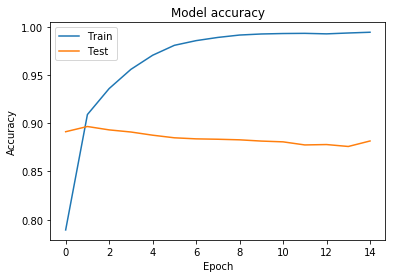

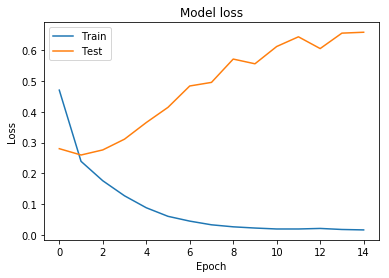

In [18]:
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()